In [2]:
import matplotlib.pyplot as plt
bigfontsize=20
labelfontsize=16
tickfontsize=16
plt.rcParams.update({'font.size': bigfontsize,
                     'axes.labelsize':labelfontsize,
                     'xtick.labelsize':tickfontsize,
                     'ytick.labelsize':tickfontsize,
                     'legend.fontsize':tickfontsize,
                     })


# Доверительные интервалы

Точечная оценка параметров модели может быть недостаточна в ряде практических применений. В задачах вывода точечная оценка дает наиболее вероятное значение параметра, но не говорит о его распределении (или, в классической интернпретации, точечная оценка не позволяет предсказать каков будет разброс этого значения при повторении эксперимента). Используя точечную оценку параметров модели для решания задачи машинного обучения, можно получить неверные вероятности принадлежности к классам (в задачах класификации).

Байесовская и классическая статистика по-разному подходят к определению доверительных интервалов. Это связано с разным пониманием самой оценки параметра. В Байесовском подходе мы модифицируем априорное представление о распределении параметра с учетом данных (байесовский вывод). Доверительные интревалы понимаются как интервалы включающие значение параметра с опреденной вероятностью и они получаются путем интегрированя апостериорной модели. В классической статистике доверительный интервал включает те значения парамеры модели которые совместимы  (с заданой вероятностью) с полученными данными. Построение доверительного интервала в класической статистике делается путем анализа совместимости имеющихся данных с выборками из моделей при фиксированных значениях параметра.

## Доверительные интервалы в Байесовской статитсике

Байесовским доверительным интервалом (credibility region) с уровнем доверия $100\times(1-\alpha)\%$ параметра $\theta$ называется интервал значений параметра $(l,u)$ который содержит $100\times(1-\alpha)\%$ распределения апостериорной плотности вероятности:

$$ C_{\alpha}(\mathcal{D}) = (l,u): P(l\leq\theta\leq u|\mathcal{D}) = 1 - \alpha $$

Сушествует бесконечно много способов выбрать доверительный интервал (даже при заданых апостерирорном распределении и уровне доверия). В примере ниже изображены три  интервала с $CL = 95\%$ для нормального апостериорного распределения.

Text(0.5, 1.0, '$95\\%$ Central limit: $\\theta \\in [-1.960,1.960]$')

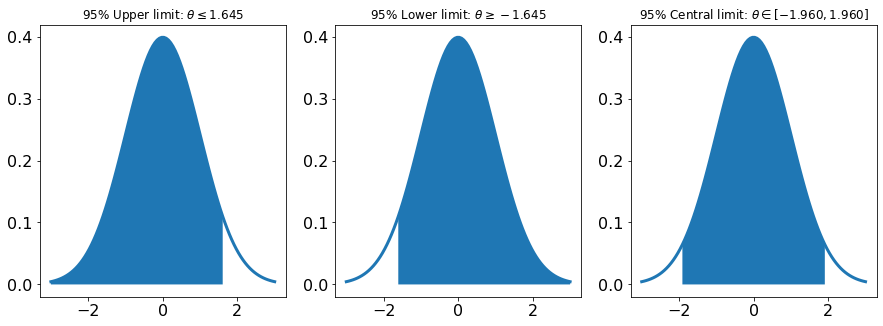

In [3]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

posterior = norm(0,1)
cl = 0.95

x = np.linspace(-3, 3, 100)

f, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].plot(x, posterior.pdf(x), linewidth = 3)
ax[0].fill_between(x, 0, posterior.pdf(x), where = x < posterior.ppf(0.95))
ax[0].set_title(f'$95\%$ Upper limit: $\\theta \leq {posterior.ppf(0.95):.3f}$')
ax[1].plot(x, posterior.pdf(x), linewidth = 3)
ax[1].fill_between(x, 0, posterior.pdf(x), where = x > posterior.ppf(0.05))
ax[1].set_title(f'$95\%$ Lower limit: $\\theta \geq {posterior.ppf(0.05):.3f}$')
ax[2].plot(x, posterior.pdf(x), linewidth = 3)
ax[2].fill_between(x, 0, posterior.pdf(x), where = (posterior.ppf(0.975) > x)&(x > posterior.ppf(0.025)))
ax[2].set_title(f'$95\%$ Central limit: $\\theta \in [{posterior.ppf(0.025):.3f},{posterior.ppf(0.975):.3f}]$')



Верхним пределом (Upper limit) называется наибольше значение параметра $\theta$ при котором интеграл распределения от наименьшего возомжного значения то предела равен уровню доверия: $\int_{-\infty}^{UL}P(\theta)d\theta = 1-\alpha$. 
   
    В анализе количнства патогенов в крови у здорового человека указывается именно верхний предел (соответсвующий, как правило, точности метода). 
 

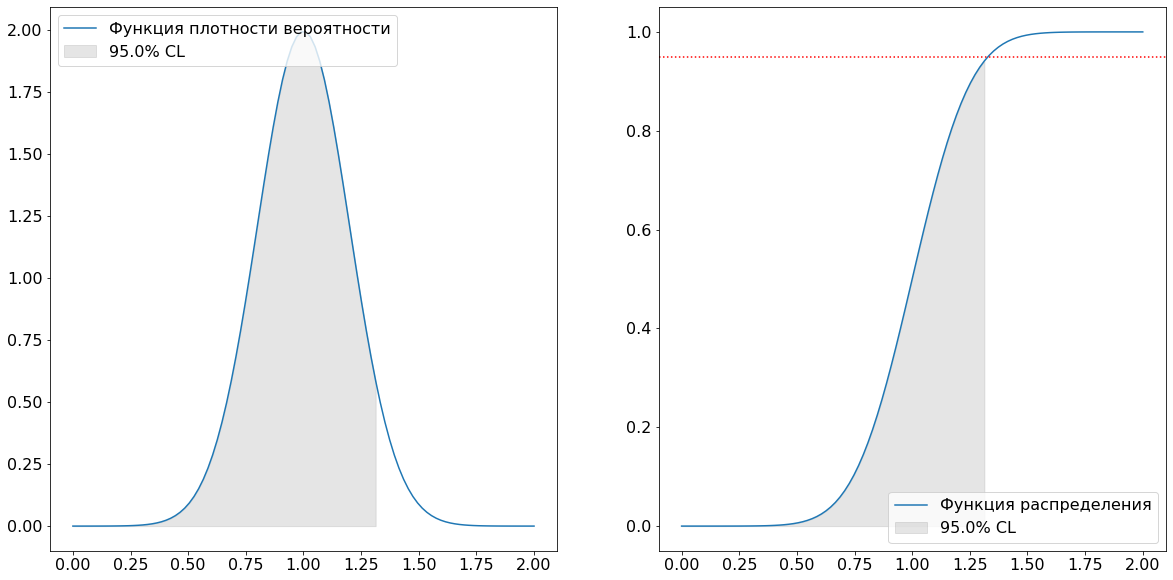

In [4]:
from scipy.stats import norm
import numpy as np
distr = norm(1, 0.2)

x = np.linspace(0, 2, 100)
pdf_vals = distr.pdf(x)
cdf_vals = distr.cdf(x)

cl = 0.95

def get_ul(x, cdf_vals, cl):
    return x[np.argmin(np.abs(cdf_vals - cl))]

ul = get_ul(x, cdf_vals, cl)

f, ax = plt.subplots(1, 2, figsize = (20, 10))

ax[0].plot(x, pdf_vals, label = "Функция плотности вероятности")
ax[0].fill_between(x, 0, pdf_vals, where = x<ul, color = "gray", alpha = 0.2, label = str(cl*100)+"% CL")
ax[0].legend(loc = 'upper left')
ax[1].plot(x, cdf_vals, label = "Функция распределения")
ax[1].axhline(cl, color = "red", ls = ":")
ax[1].fill_between(x,0, cdf_vals, where = x<ul, color = "gray", alpha = 0.2, label = str(cl*100)+"% CL")
ax[1].legend(loc = 'lower right')


Нижним пределом (Lower limit) называется минимальное значение параметра $\theta$ при котором интеграл от него и до наибольшего возомжного значения равен уровню доверия: $\int_{LL}^{\infty}P(\theta)d\theta = 1-\alpha$. 

    Система контроля сбора данных на промышленных объектах выдаст предупреждение если данных поступает меньше чем предсказаный нижний предел.
    

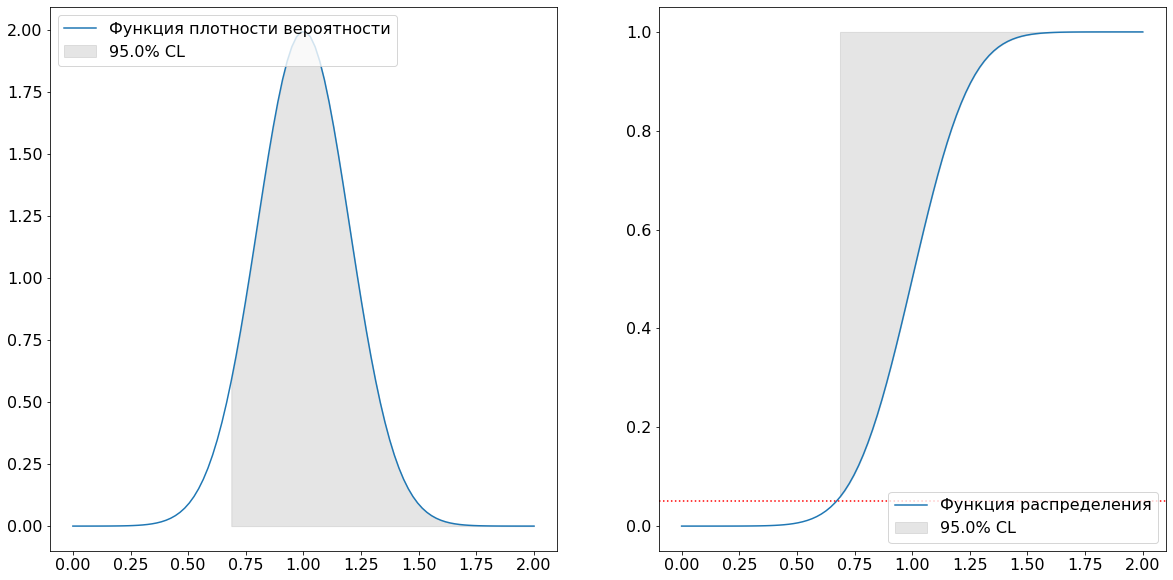

In [5]:
from scipy.stats import norm
import numpy as np
distr = norm(1, 0.2)

x = np.linspace(0, 2, 100)
pdf_vals = distr.pdf(x)
cdf_vals = distr.cdf(x)

cl = 0.95

def get_ll(x, cdf_vals, cl):
    return x[np.argmin(np.abs(1 - cdf_vals - cl))]

ll = get_ll(x, cdf_vals, cl)

f, ax = plt.subplots(1, 2, figsize = (20, 10))

ax[0].plot(x, pdf_vals, label = "Функция плотности вероятности")
ax[0].fill_between(x, 0, pdf_vals, where = x>ll, color = "gray", alpha = 0.2, label = str(cl*100)+"% CL")
ax[0].legend(loc = 'upper left')
ax[1].plot(x, cdf_vals, label = "Функция распределения")
ax[1].axhline(1 - cl, color = "red", ls = ":")
ax[1].fill_between(x,cdf_vals, 1, where = x>ll, color = "gray", alpha = 0.2, label = str(cl*100)+"% CL")
ax[1].legend(loc = 'lower right')


Центральный интревал включает в себя значение $\theta_0$ параметра функции обеспечивающее максимум распределения параметра таким образом что $\int_{l}^{\theta_0}P(\theta)d\theta = \int_{\theta_0}^{u}P(\theta)d\theta = (1-\alpha)/2$. 

    При моделировании временных рядов несколько последовательных выходов за одну и ту же границу (верхнюю или нижнюю) предсказанного центрального интревала может означать изменение тренда.  


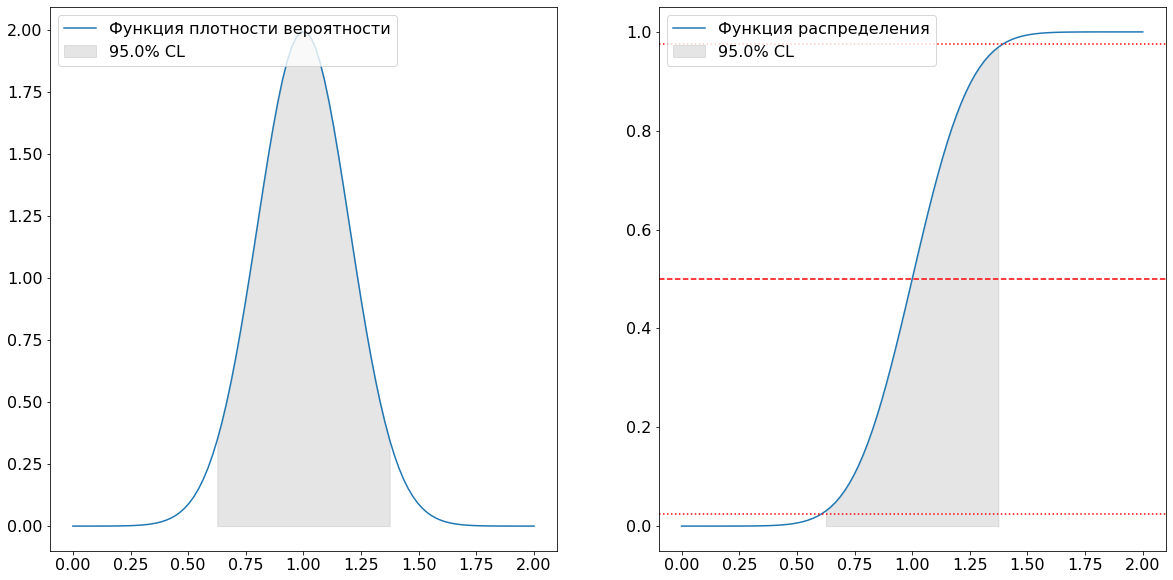

In [6]:
from scipy.stats import norm
import numpy as np
distr = norm(1, 0.2)

x = np.linspace(0, 2, 100)
pdf_vals = distr.pdf(x)
cdf_vals = distr.cdf(x)

cl = 0.95

ul = get_ul(x, cdf_vals, cl+(1-cl)/2)
ll = get_ll(x, cdf_vals, cl+(1-cl)/2)

f, ax = plt.subplots(1, 2, figsize = (20, 10))

ax[0].plot(x, pdf_vals, label = "Функция плотности вероятности")
ax[0].fill_between(x, 0, pdf_vals, where = (ul>x)&(x>ll), color = "gray", alpha = 0.2, label = str(cl*100)+"% CL")
ax[0].legend(loc = 'upper left')
ax[1].plot(x, cdf_vals, label = "Функция распределения")
ax[1].axhline(1 - (cl+(1-cl)/2), color = "red", ls = ":")
ax[1].axhline(0.5, color = "red", ls = "--")
ax[1].axhline(cl+(1-cl)/2, color = "red", ls = ":")
ax[1].fill_between(x,0, cdf_vals, where = (ll<x) &(x<ul), color = "gray", alpha = 0.2, label = str(cl*100)+"% CL")
ax[1].legend()


Интервал наибольшей плотности (Highest density interval) представляет собой наименьший возможный интервал значений параметра $\theta$ интеграл по которому равен уровню доверия. Интервал наибольшей плотности может быт разрывным и не центральным. 

    Как правило, научные статью соробщают о результатах измеерений именно в форме интервалов наибольшей плотности.


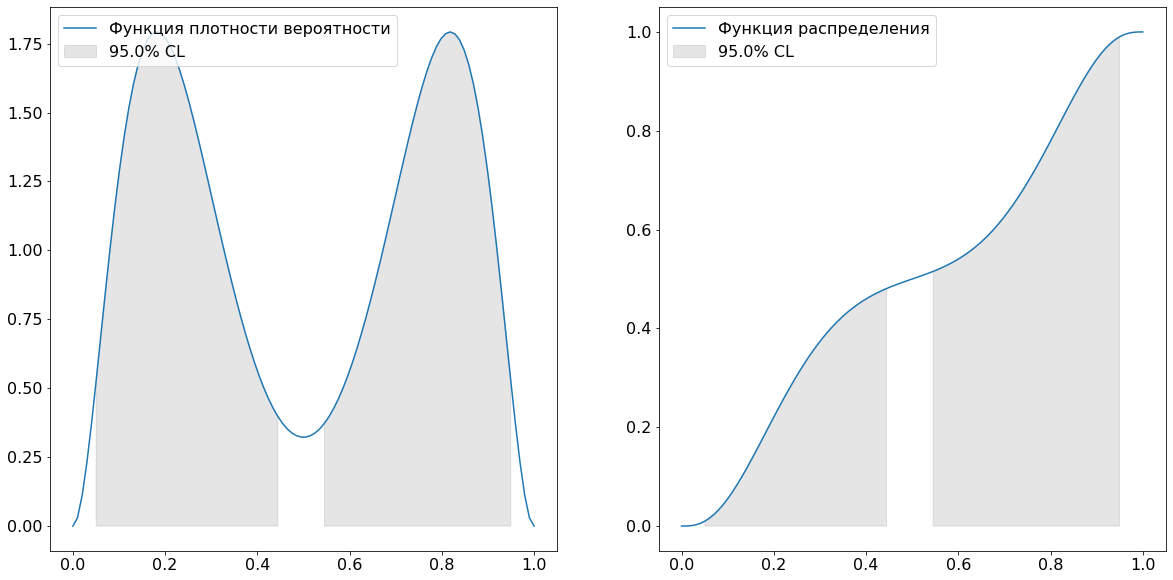

In [7]:
from scipy.stats import beta
import numpy as np

x = np.linspace(0, 1, 100)

distr_1 = beta(3, 10)
distr_2 = beta(10, 3)
pdf_vals = 0.5*distr_1.pdf(x)+0.5*distr_2.pdf(x)
cdf_vals = 0.5*distr_1.cdf(x)+0.5*distr_2.cdf(x)

cl = 0.95

def get_hdi(x, pdf_vals, cl):
    sorted_pdf = np.sort(pdf_vals)[::-1]
    dx = (np.max(x)- np.min(x))/len(x)
    integral = 0
    y_vals = []
    i_max = 0
    for i in range(len(x)):
        integral += sorted_pdf[i]*dx
        if integral >= cl:
            i_max = i-1
            break
    mask = np.in1d(pdf_vals, sorted_pdf[:i_max])
    return mask

mask = get_hdi(x, pdf_vals, cl)
f, ax = plt.subplots(1, 2, figsize = (20, 10))

ax[0].plot(x, pdf_vals, label = "Функция плотности вероятности")
ax[0].fill_between(x, 0, pdf_vals, where = mask, color = "gray", alpha = 0.2, label = str(cl*100)+"% CL")
ax[0].legend(loc = 'upper left')
ax[1].plot(x, cdf_vals, label = "Функция распределения")
ax[1].fill_between(x,0, cdf_vals, where = mask, color = "gray", alpha = 0.2, label = str(cl*100)+"% CL")
ax[1].legend()



Итак, для получения доверительного интервала значений случайной величины необходимо:

- Получить распределение вероятности этой величины
- Выбрать тип интервала
- Выбрать уровень достоверности
- Найти промежутки значений параметра интеграл по которым обеспечит выраный уровень достоверности.

В простых случаях когда апостериорная плотность вероятности описывается компактным анлитическим распределением мы можем использовать (численное) интегрирование для определнеия интервалов. В примерах выше мы использовали именно этот подход - верхние и нижние границы и центральный интервал были получены из функции распределения (интеграла функции плотности вероятности), а интервал наибольшей плотности был получен через постепенное увеличение диапазона численного интегрирования.

Рассмотрим более сложный пример в котором мы найдем доверительные интервалы сразу двух параметров. Допустим у нас есть ряд измерений полученных в эксперименте $X = \{x_1, x_2, ..., x_n\}$. Мы описваем экспримент с помошью модели в которой измеренная случайная величина распределена нормально с параметрами $(\mu, \sigma)$. Покажем как найти доверительный интервал для параметров $\mu$ и $\sigma$.

In [8]:
import tensorflow as tf
import zfit
from zfit import z
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Зададим область определения данных
obs = zfit.Space('x', limits=(0, 2))

# Зададим нормальную модель 
mu    = zfit.Parameter("mu"   , 1, 0, 2)
sigma = zfit.Parameter("sigma", 0.2, 0.1, 0.3)
gauss = zfit.pdf.Gauss(obs=obs, mu=mu, sigma=sigma)

# Сделаем выборку
np_data = norm(1, 0.2).rvs(100)
data =  zfit.Data.from_numpy(obs, np_data)
# Зададим функцию потерь
nll = zfit.loss.UnbinnedNLL(model=gauss, data=data)

# Минимизируем функцию потерь
minimizer = zfit.minimize.Minuit()
result = minimizer.minimize(nll)
print(result)

# Построим MLE оценку
x_plot = np.linspace(0, 2, 1000)
y_plot = zfit.run(gauss.pdf(x_plot, norm_range=obs))


2022-11-25 09:45:08.027141: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/envs/lectures/lib/python3.10/site-packages/zfit/__init__.py:62: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(
/opt/anaconda3/envs/lectures/lib/python3.10/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.7.0 and strictly below 2.10.0 (nightly versions are not supported). 
 The versions of TensorFlow you are cu

FitResult of
<UnbinnedNLL model=[<zfit.<class 'zfit.models.dist_tfp.Gauss'>  params=[mu, sigma]] data=[<zfit.core.data.Data object at 0x7fd5cb5b7cd0>] constraints=[]> 
with
<Minuit Minuit tol=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm     │ min value   │
╞═════════╪═════════════╪══════════════════╪═════════╪═════════════╡
│ True    │ True        │ False            │ 1.5e-05 │ 998.5784    │
╘═════════╧═════════════╧══════════════════╧═════════╧═════════════╛

Parameters
name      value  (rounded)    at limit
------  ------------------  ----------
mu                 1.02329       False
sigma             0.182935       False


In [16]:
# Построим апостериорное распределение
# Это двухмерная функция в пространстве (mu, sigma)
n_mus = 100
n_sigmas = 100
mus = np.linspace(0.8, 1.12, n_mus)
sigmas = np.linspace(0.1,0.3, n_sigmas)

nll_grid = np.zeros((n_sigmas,n_mus))
for i,_mu in enumerate(mus):
    for j,_sigma in enumerate(sigmas):
        p = np.array([_mu, _sigma]) 
        nll_grid[j,i] = float(nll(p))
        
nll_grid -= np.min(nll_grid)
likelihood_grid = np.exp(-nll_grid)
post_grid = likelihood_grid/likelihood_grid.sum()


In [17]:
# Найдем HDI для обоих переменных
cl = 0.68
sorted_grid = np.sort(post_grid.flatten())[::-1]
integral = 0
i_max = 0
for i in range(len(mus)*len(sigmas)):
    integral += sorted_grid[i]
    if integral >= cl:
        i_max = i-1
        break
mask = np.array([np.in1d(v, sorted_grid[:i_max]) for v in post_grid])

In [22]:
# Найдем HDI для параметра mu с той же достоверностью
# В этом случае мы интегрируем по всем значениям
# параметра sigma
mu_post_grid = np.array([np.sum(x) for x in post_grid.T])
integral = 0
i_max = 0
mu_sorted_grid = np.sort(mu_post_grid)[::-1]
for i in range(len(mus)):
    integral += mu_sorted_grid[i]
    if integral >= cl:
        i_max = i-1
        break
mu_mask = np.array([np.in1d(v, mu_sorted_grid[:i_max]) for v in mu_post_grid])

In [31]:
# Границы совместного доверительного интервала
muv, sigmav = np.meshgrid(mus, sigmas)
mu_ll = np.min(muv[mask])
mu_ul = np.max(muv[mask])

sigma_ll = np.min(sigmav[mask])
sigma_ul = np.max(sigmav[mask])

# Границвы интервала для параметра mu
mu_true_ll = np.min(mus[mu_mask.flatten()])
mu_true_ul = np.max(mus[mu_mask.flatten()])


/var/folders/1q/hskc64tj4gj_gv87kwczzcp00000gp/T/ipykernel_76501/2502049449.py:16: UserWarning: The following kwargs were not used by contour: 'color'
  ax[2].contourf(mus, sigmas, np.ones((n_mus,n_sigmas))*mask, color = 'red')
/var/folders/1q/hskc64tj4gj_gv87kwczzcp00000gp/T/ipykernel_76501/2502049449.py:28: UserWarning: The following kwargs were not used by contour: 'color'
  ax[3].contourf(mus, sigmas, np.ones((n_mus,n_sigmas))*mu_mask.T, color = 'red')


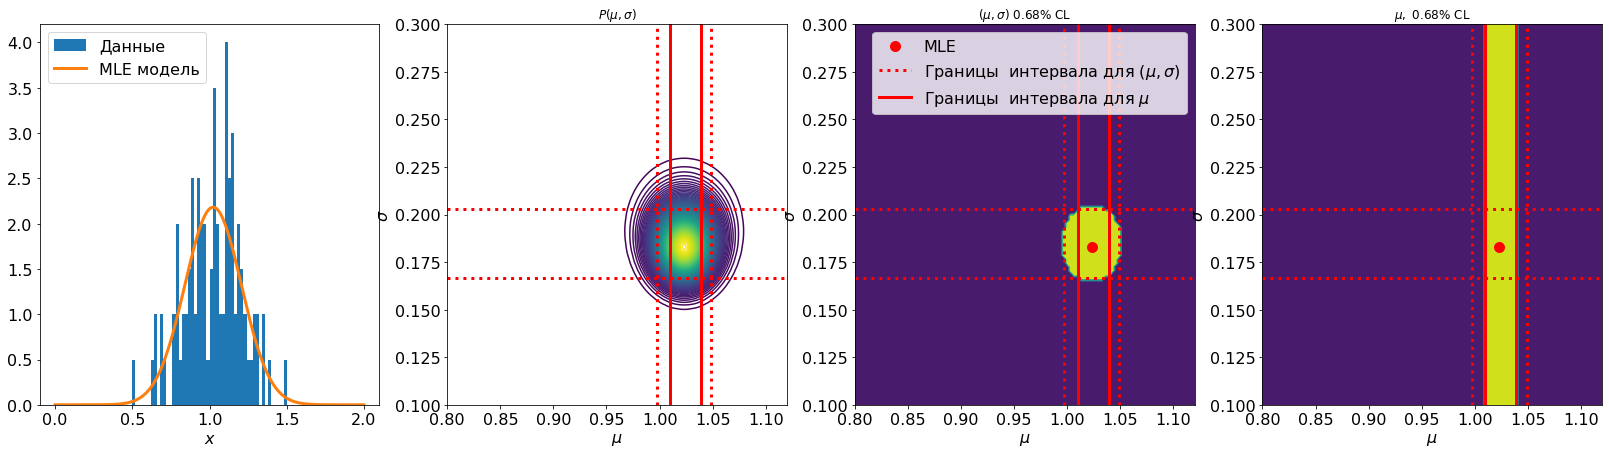

In [41]:
f, ax = plt.subplots(1, 4, figsize = (28, 7))
ax[0].hist(np_data, range = [0, 2], bins = 100, density = True, label = "Данные")
ax[0].plot(x_plot, y_plot, linewidth = 3,  label = "MLE модель")
ax[0].set_xlabel("$x$")
ax[0].legend()
ax[1].contour(mus, sigmas, post_grid, 100)
ax[1].axvline(mu_ll, color = 'red', ls = ":", linewidth = 3, label = "Границы  интервала для $(\mu, \sigma)$")
ax[1].axvline(mu_ul, color = 'red', ls = ":", linewidth = 3)
ax[1].axvline(mu_true_ll, color = 'red', linewidth = 3, label = "Границы  интервала для $\mu$")
ax[1].axvline(mu_true_ul, color = 'red', linewidth = 3)
ax[1].axhline(sigma_ll, color = 'red', ls = ":", linewidth = 3)
ax[1].axhline(sigma_ul, color = 'red', ls = ":", linewidth = 3)
ax[1].set_xlabel("$\mu$")
ax[1].set_ylabel("$\sigma$")
ax[1].set_title("$P(\mu, \sigma)$")
ax[2].contourf(mus, sigmas, np.ones((n_mus,n_sigmas))*mask, color = 'red')
ax[2].scatter([result.params['mu']['value']],[result.params['sigma']['value']], color = "red", s = 100, label = "MLE")
ax[2].axvline(mu_ll, color = 'red', ls = ":", linewidth = 3, label = "Границы  интервала для $(\mu, \sigma)$")
ax[2].axvline(mu_ul, color = 'red', ls = ":", linewidth = 3)
ax[2].axvline(mu_true_ll, color = 'red', linewidth = 3, label = "Границы  интервала для $\mu$")
ax[2].axvline(mu_true_ul, color = 'red', linewidth = 3)
ax[2].axhline(sigma_ll, color = 'red', ls = ":", linewidth = 3)
ax[2].axhline(sigma_ul, color = 'red', ls = ":", linewidth = 3)
ax[2].legend()
ax[2].set_xlabel("$\mu$")
ax[2].set_ylabel("$\sigma$")
ax[2].set_title(f'$(\mu,\sigma)$ {cl}% CL')
ax[3].contourf(mus, sigmas, np.ones((n_mus,n_sigmas))*mu_mask.T, color = 'red')
ax[3].scatter([result.params['mu']['value']],[result.params['sigma']['value']], color = "red", s = 100, label = "MLE")
ax[3].axvline(mu_ll, color = 'red', ls = ":", linewidth = 3, label = "Границы  интервала для $(\mu, \sigma)$")
ax[3].axvline(mu_ul, color = 'red', ls = ":", linewidth = 3)
ax[3].axvline(mu_true_ll, color = 'red', linewidth = 3, label = "Границы  интервала для $\mu$")
ax[3].axvline(mu_true_ul, color = 'red', linewidth = 3)
ax[3].axhline(sigma_ll, color = 'red', ls = ":", linewidth = 3)
ax[3].axhline(sigma_ul, color = 'red', ls = ":", linewidth = 3)
ax[3].set_xlabel("$\mu$")
ax[3].set_ylabel("$\sigma$")
ax[3].set_title(f'$\mu,$ {cl}% CL')
plt.show()

Обратите внимание, что доверительный интервалы для параметра $\mu$ оказался уже чем границы доверительного интервала для комбинации парамтеров $(\mu, \sigma)$ по параметру $\mu$ (красные линии на правом рисунке пересекают желтую область доверительного интервала обоих парметров).

Примеры выше показывают как найти доверительные интервалы используя распределение случайной величины. Это распределение может быть точным или приближенным (подробнее о приближенных функциях плотности вероятности рассказвыается в Лекции 4). Во многих пакетах для статистического анализа данных (`Root`, `zfit`) доверительные интервалы считаются из приближения Лапласса - апостериорное распределение считается нормальным (в случае с несколькими параметрами это мультивариативное нормальное распределение), что позволяет найти доверительные интервалы для величин исходя из Гессиана в максимуме. Сравние интервалы пакета `zfit` с полученными выше:

In [75]:
zfit_ll = result.params['mu']['value']+result.error()[mu]['lower']
zfit_ul = result.params['mu']['value']+result.error()[mu]['upper']
print(f'Наш интервал для перменнной mu:[{round(mu_true_ll,3)},{round(mu_true_ul,3)}]')
print(f'Интервал полученный приближением Лапласса :[{round(zfit_ll,3)} ,{round(zfit_ul,3)}]')

Наш интервал для перменнной mu:[1.01,1.039]
Интервал полученный приближением Лапласса :[1.005 ,1.042]


## Доверительные интервалы в классической статистике

Выше мы рассмотрели как находить интервалы содержащие в себе значение случайной величины с заданой вероятностью. Этот подход, однако, не работает в классической статистике. В самом деле, в класической статистике неизвестный параметр модели считается истиным, а полученные данные  - случайной выборкой из модели. Соответственно, в классической статитиске, мы хотим найти интервал который будет включать в себя (с заданой вероятностью) значения параметра которые будут находиться при повторении эксперимента. 

    Представьте что мы меряем вероятность монетки упасть "орлом" по серии из 10 бросков и хотим найти 95% доверительный интервал этой величины. В байесовской статистике, мы выберем модель описывающую вероятность (скажем, Бета-распределение), выберем априорные значения, найдем апостериорное распределение вероятности нашей величины и от туда найдем интересующий нас доверительный интервал. В классической статистике мы во-первых определяем оператор нахождения искомой величины по выборке (в данном случае, например, число "орлов" деленое на число бросков) ва во-вторых мы хотим найти такой интервал значний вероятности, который бы включал в среднем 95 из 100 значений полученных в 100 выборках по 10 бросков. 
    


На рисунке ниже изображен 95% центральный доверительный интервал вероятности выпадения "орла" оцененой на серии 10 бросков. Кроме того, на рисунке показаны 1000 оценок полученных в 1000 экспериментах по 50 бросков каждый. Видно, что интервал выбран таким образом, чтобы включать 95% значений. В реальности уровень доверия оказался чуть сильнее из-за дискрености возможных значений.

Text(0.5, 1.0, '95.5% Доверительный интервал')

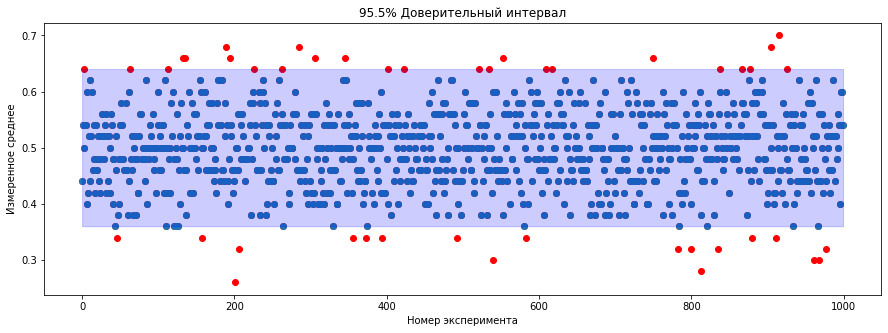

In [39]:
from scipy.stats import bernoulli
from matplotlib import pyplot as plt
import numpy as np

sample_size = 50
n_samples = 1000
true_p = 0.5
distr = bernoulli(true_p)

def estimator(sample):
    return sample.mean()

estimates = []

for s in range(n_samples):
    _sample = distr.rvs(size = sample_size)
    estimates.append(estimator(_sample))
estimates = np.array(estimates)  
ll, ul = np.percentile(estimates, [2.5, 97.5])

f = plt.figure(figsize = (15,5) )
plt.scatter(range(n_samples), estimates, color = 'red')
plt.scatter(np.arange(n_samples)[(estimates>=ll) * (estimates<ul)], estimates[(estimates>=ll) * (estimates<ul)])
plt.fill_between(np.arange(n_samples), ll, ul, color = "blue", alpha = 0.2)
plt.xlabel("Номер эксперимента")
plt.ylabel("Измеренное среднее")
plt.title(f"{100*(len(estimates[(estimates>=ll) * (estimates<ul)])/n_samples)}% Доверительный интервал")

Мы опредлили доверительный интервал проведя серию экспериментов. Это позволило нам быть абсолютно независимыми от модели. Но проведение тысяч экспериментов зачастую слишком дорого. Ниже мы рассмотрим способы определния классического доверительного интервала по результатм всего _одного_ эксперимента.

### Оценка и выборочное распределение

Прежде чем перейти к разговору о нахождении классического доверительного интервала необходимо точнее определить интервал чего именно мы ищем. Этот интервал не может быть интервалом значений искомого параметра - ведь в классической статистике параметр не является случайной величиной. Вместо этого, случайными являются выборки, а с ними статистики полученные из _оценок_ параметра. Оценкой $\pi$ (estimator) в классической статистике называется способ сопоставления набора значений $\hat{\boldsymbol{\theta}}$ имеющейся выборке 
$\mathcal{D}$: 

$$\hat{\boldsymbol{\theta}} = \pi(\mathcal{D})$$

В предыдущей лекции мы рассмотрели примеры оценок. Метод моментов, оценка наибольшего правдоподобия, оценка наибольшего апостериорного распределения - все это оценки значений параметра по данной статистике. В примере выше _оценка_ состояла в вычислении среднего числа выпадания "орла".

_Выборочным распределением_ (sampling distribution) называется распределение значений оценки на бесконечном множестве выборок из одного и того же распределения. В примере выше распределение значений в векторе `estimates` стремилось бы к выборочныму распределению с ростом числа выборок. Если считать оценку параметра случайной величиной, то выборочное распределение будет распределением этой случайной величины.

Представим что некоторая случайная величина распределена по закону $p(\boldsymbol{x}|\boldsymbol{\theta^*})$. Нашей задачей является определение параметра $\boldsymbol{\theta^*}$ по выборке размера $N$ случайных значений $\mathcal{D}=\{x_1,...x_N\}$ полученых из распределения выше (такая выборка обозначается как $\mathcal{D}\sim \boldsymbol{\theta^*}$). Мы решаем эту задачу предлагая оценку $\hat{\boldsymbol{\theta}} = \pi(\mathcal{D})$. Представим теперь что у нас имеется $S$ выборок по $N$ значений. В таком случае, выборочное распределение оценки $\hat{\boldsymbol{\theta}}$ будет описывать вероятность получения значения $\boldsymbol{\theta}$ на случайной выборке $\mathcal{\tilde{D}}$ при условии того что выборка была получена из изначального распределения ($\tilde{D}\sim\boldsymbol{\theta^*}$).

$$p(\pi(\mathcal{\tilde{D}}) = \boldsymbol{\theta}|\tilde{D}\sim\boldsymbol{\theta^*}) = \lim_{S\to\infty}\frac{1}{S}\sum_{s=1}^{S}\delta(\boldsymbol{\theta} - \pi(\mathcal{\tilde{D}}^{s}))$$

Отметим, что выборочное распределение зависит от параметра $\boldsymbol{\theta^*}$ и размера выборки $\mathcal{D}$. Для иллюстрации рассмотрим как меняются выбороычные распределения для оценки среднего $\hat{\mu}$ по выборке из нескольких пуассоновских величин в зависимости от истиного значения среднего $\mu^*$ и размера выборки.

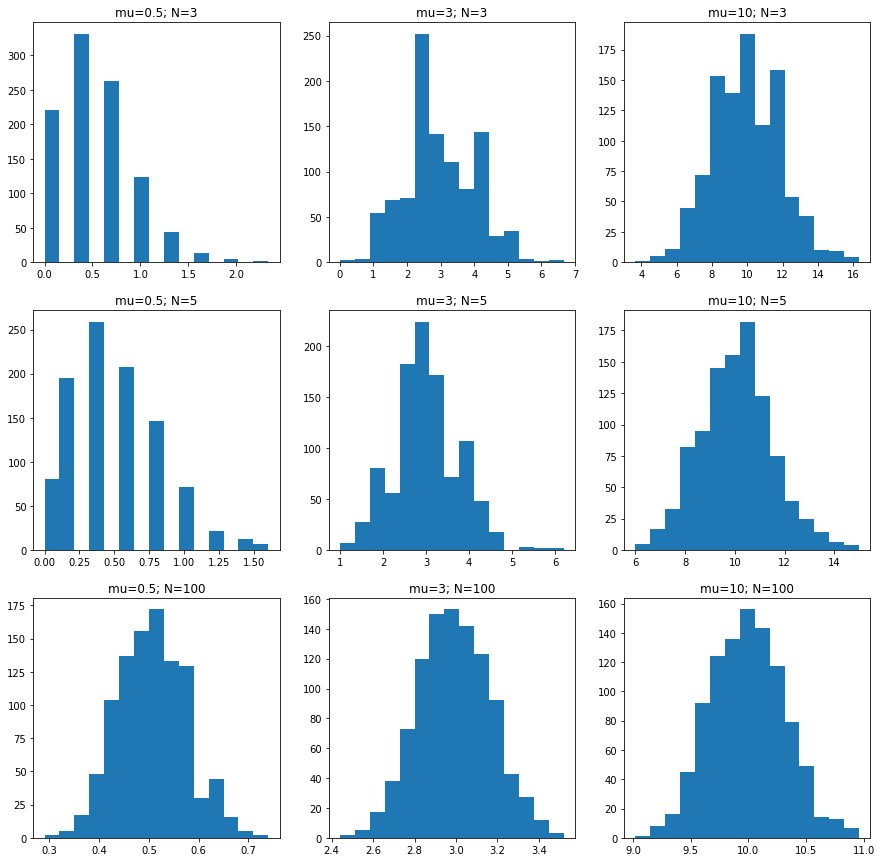

In [79]:
from scipy.stats import poisson

mus = [0.5, 3, 10]
Ns = [3, 5, 100]
n_samples = 1000

f, ax = plt.subplots(len(mus), len(Ns), figsize = (5*len(Ns), 5*len(mus)))
for i, mu in enumerate(mus):
    for j, n in enumerate(Ns):
        estimates = []
        for _ in range(n_samples):
            estimates.append(poisson(mu).rvs(size = n).mean())
        ax[j, i].hist(estimates, bins = 15)
        ax[j, i].set_title(f"mu={mu}; N={n}")
        

### Выборочное распределение для MLE

В некоторых случаях выборочное распределение можно аппроксимировать аналитически. Так, можно показать что для оценки MLE выборочное распределение стеремится к нормальному с ростом выборки.

$$p(\pi(\mathcal{\tilde{D}}) \rightarrow \mathcal{N}(\hat{\boldsymbol{\theta}}|\boldsymbol{\theta^*}, (N\boldsymbol{F}(|\boldsymbol{\theta^*}))^{-1})$$

В формуле выше $\boldsymbol{F}$ является информационной матрицей Фишера. Матрица Фишера является ковариацией градиента логарифма функции правдоподобия. В случае функция правдоподобия дважды дифференцируема и выполняются некоторые дополнительные условия, матрица Фишера имеет смысл Гессиана обратного логарифма функции правдоподобия:

$$F_{ij} = - \mathbb{E}_{x\sim\theta}[\frac{\partial^2}{\partial \theta_i \partial\theta_j}\log p(\boldsymbol{x}|\boldsymbol{\theta})]$$

Этот результат не должен быть удивительным - в одной из первых лекций мы говорили о том что оценка среднего по выборке распределена нормально и дисперсия оценки обратно пропорциональна размеру выборки.


### Бутстрап и выборочное распределение

В случае если оценка является более сложной чем MLE (например, при решении задачи регрессии с помощью ансамбля деревьев решений) или при малом количестве данных аппроксимация выше не подходит. В этом случе на помощь приходит метод бутстрапа о котором мы говорили в одной из первых лекций. 

Идея бутстрапа заключается в получении приблизительного выборочного распределения генерируя результаты _псевдоэкспериментов_ на основе имеющейся выборки. 

#### Параметрический бутстрап

Если бы нам было известно истиное значение параметра $\boldsymbol{\theta^*}$, мы могли бы использовать его для генерации бесконечно большого числа выборок $\mathcal{D}^{s}\sim\boldsymbol{\theta^*}$ и последующего построения выборочного распределения. Посколько истиное значение параметра нам не известно, мы можем воспользоваться плагин аппроксимацией и сгенерированть псевдоэксперименты на основе оценки полученой на имеющейся выборке $\boldsymbol{\theta} = \pi(\mathcal{D})$. Рассмотрим этот метод на примере ниже. Пусть у нас случайная величниа $x\sim\mathcal{N}(\mu,1)$ и есть выборка их 5 значений этой случайной величнны. Построим выборочное распредеелние параметра $\mu$ с помощью параметрического бутстрапа и сравним его с истиным распределением.

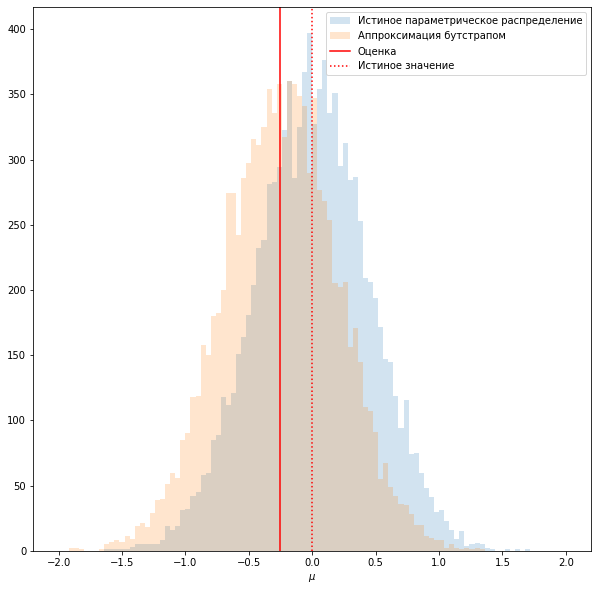

In [44]:
from scipy.stats import norm

true_mu = 0
sample_size = 5
n_samples = 10000

distr = norm(true_mu, 1)

sample = distr.rvs(size = sample_size)

# real paramteric distribution
estimates = []
for s in range(n_samples):
    _sample = distr.rvs(sample_size)
    estimates.append(_sample.mean())
    
# Parametric bootstrap    
est_mu = sample.mean()
plugin_distr = norm(est_mu, 1)
b_estimates = []
for s in range(n_samples):
    _sample = plugin_distr.rvs(sample_size)
    b_estimates.append(_sample.mean())
    
f = plt.figure(figsize = (10, 10))

plt.hist(estimates, range = [-2, 2], bins = 100, alpha = 0.2,  label = "Истиное параметрическое распределение")
plt.hist(b_estimates, range = [-2, 2], bins = 100, alpha = 0.2,  label = "Аппроксимация бутстрапом")
plt.axvline(sample.mean(), color = "red", label = "Оценка")
plt.axvline(true_mu, color = "red", ls = ":", label = "Истиное значение")
plt.xlabel("$\mu$")
plt.legend()



#### Непараметрический бутстрап

В случае по каким-то причниам генеративная модель $p(x|\theta)$ для даных не может быть использована, можно обойтись без нее. В этом случае псевдо-выборки получаются выборкой с повторениями из оригинальной выборки. В начале курса мы использовали непараметрический бутстрап для оценки ошибки среднего.

Рассмотрим применение непараметрического бутстрапа к оценке разброса предсказаний в задаче регрессии. Пусть имеется обучающая выборка $(y_i, \boldsymbol{x_i})$ и мы хотим предсказать $y=f(\boldsymbol{x})$ с помошью модели `GBDT`. Для получения дисперсии оценки, мы создадим $S=1000$ выборок с повторениями из обучающей выборки и на каждой из них обучим новую модель. Полученый ансамбль моделей мы будем использовать для построения выборочного расрпеделения предсказаний. 

Text(0.5, 1.0, 'GBDT')

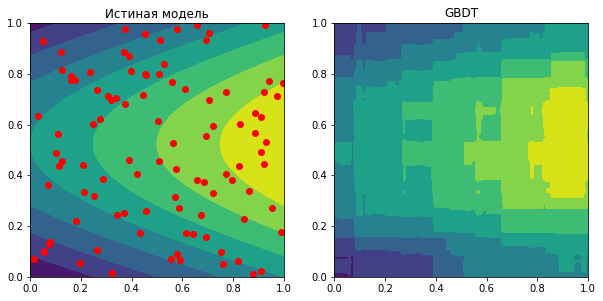

In [68]:
from scipy.stats import norm
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor

rel_variance = 0.05

x_1 = np.random.random(100)
x_2 = np.random.random(100)
x = np.array(list(zip(x_1, x_2)))
def func_mean(x_1, x_2):
    return x_1+np.sin(x_2 * 3)


y_true = func_mean(x_1, x_2)
y = np.array([norm(y, rel_variance*y).rvs() for y in y_true ])

reg = GradientBoostingRegressor()
reg.fit(x, y)

import matplotlib.pyplot as plt
xp_1 = np.linspace(0,1,100)
xp_2 = np.linspace(0,1,100)
xs_1, xs_2 = np.meshgrid(xp_1, xp_2)

xs = np.array(list(zip(xs_1.flatten(), xs_2.flatten())))

ys = func_mean(xs_1, xs_2)
y_pred = reg.predict(xs)

f, ax = plt.subplots(1, 2, figsize = (10, 5))

ax[0].contourf(xp_1, xp_2, ys)
ax[0].scatter(x_1, x_2, color = "red")
ax[0].axis('scaled')
ax[0].set_title("Истиная модель")
ax[1].contourf(xp_1, xp_2, y_pred.reshape(100, 100))
ax[1].axis('scaled')
ax[1].set_title("GBDT")

# ax[0].colorbar()


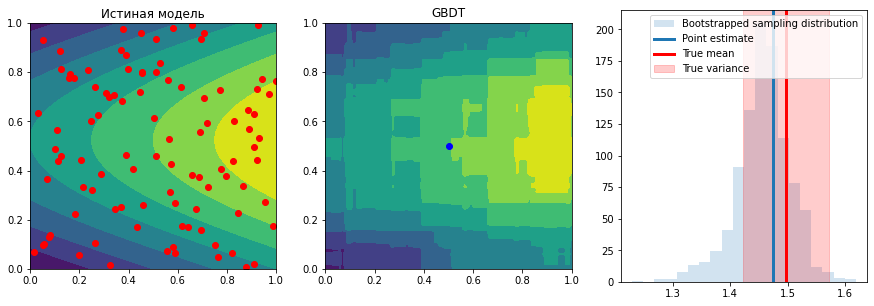

In [70]:
# Procedure for training model on bootstrapped selection
rng = np.random.default_rng()
def get_bootstrapped_estimate(data, test):
    _d = rng.choice(data, size=len(data), replace=True).T
    _y = _d[0]
    _x_1 = _d[1]
    _x_2 = _d[2]
    _x = np.array(list(zip(_x_1, _x_2)))
    _reg = GradientBoostingRegressor()
    _reg.fit(_x, _y)
    return _reg.predict(test)[0]


n_bootstrap = 1000
test_x = [[0.5, 0.5]]
test_y = func_mean(*test_x[0])
estimates = []
data = np.array(list(zip(y, x_1, x_2)))
for _s in range(n_bootstrap):
    estimates.append(get_bootstrapped_estimate(data, test_x))
    
f, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].contourf(xp_1, xp_2, ys)
ax[0].scatter(x_1, x_2, color = "red")
ax[0].axis('scaled')
ax[0].set_title("Истиная модель")
ax[1].contourf(xp_1, xp_2, y_pred.reshape(100, 100))
ax[1].scatter(*test_x[0], color = "blue")
ax[1].axis('scaled')
ax[1].set_title("GBDT")
ax[2].hist(estimates, bins = 20, alpha = 0.2, label = "Bootstrapped sampling distribution")
ax[2].axvline(reg.predict(test_x), linewidth = 3, label = "Point estimate")
ax[2].axvline(test_y, linewidth = 3, color = "red", label = "True mean")
ax[2].axvspan(test_y*(1-rel_variance),\
              test_y*(1+rel_variance),alpha = 0.2, color = "red", label = "True variance")
ax[2].legend()


Отметим, что непараметрический бутстрап из примера выше позволяет оценить дисперсию связаную с ограниченностью обучающей выборки. Этим можно удовлетвориться если основной вклад в ошибку предсказаний дает именно ограниченность выборки. Но что если обучающая выборка бесконечно растет? В этом случае бутсрапированное выборочное распределение будет сходиться к дельта-функции, и ошибка предсказаний будет складываться из стохастической природы данных и смещения модели. Для учета этих вкладов в ошибку алгоритмов основанных на деревьях можно воспользоваться алгоритмом [NGBoost](https://stanfordmlgroup.github.io/projects/ngboost/). Мы поговорим о натуральном градиенте в следующих лекциях.

### Доверительные интервалы в классической статистике

Итак, доверительным интервалом в классическй статистике является такой интервал $I(\tilde{\mathcal{D}})$, который включает в себя значения параметра сгенерировавшие данные $\tilde{\mathcal{D}}$ с заданой вероятностью $100\times(1-\alpha)\%$:

$$Pr(\theta\in I(\tilde{\mathcal{D}})|\tilde{\mathcal{D}}\sim\theta) = 1-\alpha$$

Если бы мы знали истиное значение параметра $\boldsymbol\theta^*$ (генерирующее выборки экспериментальных данных $\tilde{\mathcal{D}}$), мы могли бы взять выборочное распределение полученное для этого значения параметра и получить из него интевалы тем же образом, которым мы получали их для байесовского случая. 

Однако если бы нам было известно значение $\boldsymbol\theta^*$, мы вряд ли стали бы искать довертиельные интервалы. Одним из возможных вариантов действий может быть плагин аппроксимация: 
- Мы получаем оценку параметра $\hat{\boldsymbol{\theta}} = \pi(\mathcal{D})$ на имеющихся данных
- Мы строим выборочное распределение вокруг этого значения $p( \boldsymbol{\theta} = \hat{\boldsymbol{\theta}}|\tilde{D}\sim\hat{\boldsymbol{\theta}}) $
- Мы используем это выборочное распределение для получения доверительныех интервало так же как мы это делали в байесовском случае

Если у нас есть подозрения что полученая оценка оказывается смещеной (например, мы имеем дело с малым количеством данных) и плагин аппроксимация явлется слишком сильным допущением, классическая статистика предлагает оценку доверительных интервалов с помощью конструкции Неймана (Neyman construction, Neyman belt).

Суть метода сводится к следующему:

- Мы рассматриваем возможные значения параметра $\theta$ и для каждого значения строим выборочное распределение. Мы выбираем интервал значений параметра включающий нужную часть распределения (например, 95%)
- Мы наносим найденый интервал на двумерную плоскость где ось ординат соответсвует выбраному "истиному" значению параметра а ось абсцисс - возможному измереному значению. Таким образом, интервал будет представлять собой, например, отрезок параллельный оси абсциисс.
- Мы повторяем это процедуру для всех значений параметра $\theta$ и нанесенные отрезки соединяются в "пояс"
- Мы проводим экспримент, и проводим вертикальную черту проходящую через измеренное значение параметра
- Область пересечения вертикальной чертной пояса Неймана и будет классическим доверительным интервалом.

Рассмотрим эту (не самую интуитивно понятную) конструкцию на примере. Классической иллюстрацией является нахождение доверительного интервала для среднего для Пуассоновского сигнала совмещенного с известным Пуассоновским фоном. 
    
    Представим, что мы мониторим уровень радиации в лаборатории с помощью счетчика Гейгера. Мы знаем, что фоновый уровеь радиации соответсвует 3.5 щелчкам счетчика в минуту. Если в лаборатории происходит утечка радиации, то количество щелчков увеличится. Теперь, представим что мы задетектировали 8 щелчков. Каков  95% интервал для дополнительного уровня радиации (в щелчках в минуту)? Другими словами, мы наблюдаем сумму двух случайных величин, каждая из которых распределена по Пуассону. Среднее одной из слуайных вличин нам известно. Зная наблюдение, как найти доверительный интевал для другого среднего.


Создадим конструкцию Неймана:

In [93]:
from scipy.stats import poisson

n_samples = 10000
mu_bkg = 3.5
bkg = poisson(3.5)

upper_limits = []
lower_limits = []
mus_sig = np.linspace(0.001, 20.001, 100)
# Скаинруем значения параметра модели
for mu_sig in mus_sig:
    sig = poisson(mu_sig)
    # Строим выборочное распределеие
    observations = []
    for _ in range(n_samples):
        n_sig = sig.rvs()
        n_bkg = bkg.rvs()
        observations.append(n_sig + n_bkg)
    # Находим доверительные интервалы   
    upper_limits.append(np.percentile(np.array(observations),97.5))
    lower_limits.append(np.percentile(np.array(observations),2.5))

Object `plt.axvline(8, color = "red", label = "")` not found.


Text(0, 0.5, 'Среднее значение сигнальных событий')

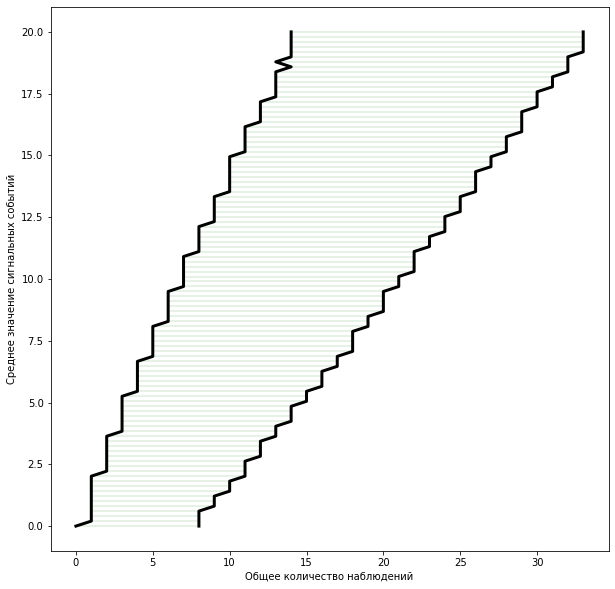

In [94]:
f = plt.figure(figsize = (10, 10))
# Строим интервалы для сканированных значений
for i, mu_sig in enumerate(mus_sig):
    plt.plot([lower_limits[i],upper_limits[i]],[mu_sig, mu_sig], color = "green", linewidth = 0.2)
    
plt.plot(lower_limits, mus_sig, color = "black", linewidth = 3)
plt.plot(upper_limits, mus_sig, color = "black", linewidth = 3)
#plt.axvline(8, color = "red", label = "")
plt.xlabel("Общее количество наблюдений")
plt.ylabel("Среднее значение сигнальных событий")


Отметим экспериментальное количество наблюдений и определим доверительный интервал для среднего числа сигнальных событий

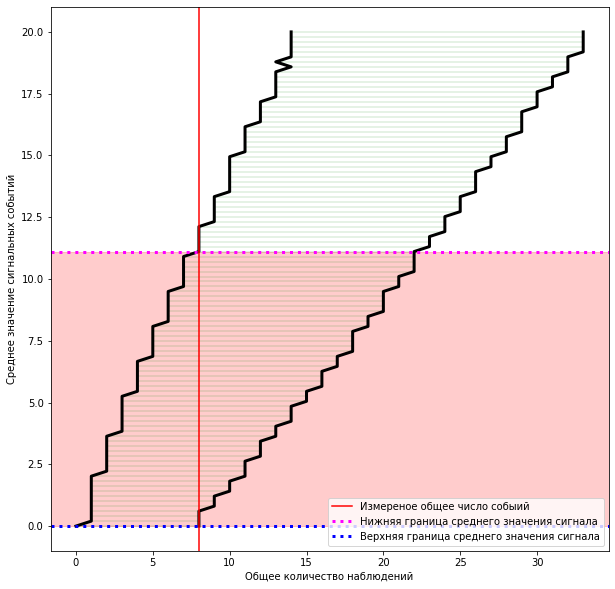

In [105]:
obs_true = 8

ll = 0
ul = None

for i, mu_sig in enumerate(mus_sig):
    if (ll == 0) and lower_limits[i]>= obs_true:
        ll =  mu_sig
    if (ul is None) and upper_limits[i]>= obs_true:
        ul =  mu_sig
        
    
f = plt.figure(figsize = (10, 10))
# Строим интервалы для сканированных значений
for i, mu_sig in enumerate(mus_sig):
    plt.plot([lower_limits[i],upper_limits[i]],[mu_sig, mu_sig], color = "green", linewidth = 0.2)
    
plt.plot(lower_limits, mus_sig, color = "black", linewidth = 3)
plt.plot(upper_limits, mus_sig, color = "black", linewidth = 3)
plt.axvline(8, color = "red", label = "Измереное общее число собыий")
plt.axhline(ll, color = "magenta", ls = ":", linewidth = 3, label = "Нижняя граница среднего значения сигнала")
plt.axhline(ul, color = "blue", ls = ":", linewidth = 3, label = "Верхняя граница среднего значения сигнала")
plt.axhspan(ll,ul, color = "red", alpha = 0.2)
plt.xlabel("Общее количество наблюдений")
plt.ylabel("Среднее значение сигнальных событий")
plt.legend()
   

Для иллюстарции, найдем теперь Байесовский интервал из функции правдоподобия (мы используем неинформативный праер для искомого значения)

Text(0.5, 1.0, 'Апостериорное распределение')

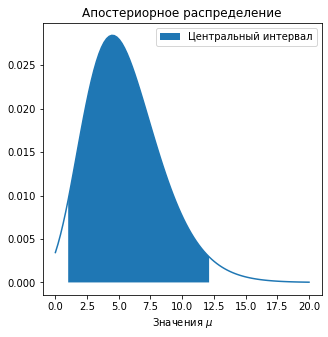

In [123]:
likelihood = []
for i, mu_sig in enumerate(mus_sig):
    prob = 0
    # Sum over possible backgorund+signal combinations
    for n_bkg in range(obs_true+1):
        prob += poisson(mu_bkg).pmf(n_bkg)*poisson(mu_sig).pmf(obs_true - n_bkg)
    likelihood.append(prob)
likelihood = np.array(likelihood)
posterior = likelihood/likelihood.sum()
cdf = posterior.cumsum()
bayessian_ll = 0
bayessian_ul = None
for i, mu_sig in enumerate(mus_sig):
    if (bayessian_ll == 0) and (cdf[i] > 0.025):
        bayessian_ll = mu_sig
    if (bayessian_ul is None) and (cdf[i] > 0.975):
        bayessian_ul = mu_sig

f = plt.figure(figsize = (5, 5))
plt.plot(mus_sig, posterior)
plt.fill_between(mus_sig, posterior, where = (mus_sig>bayessian_ll) *  (mus_sig<bayessian_ul), label = "Центральный интервал")
plt.legend()
plt.xlabel("Значения $\mu$")
plt.title("Апостериорное распределение")

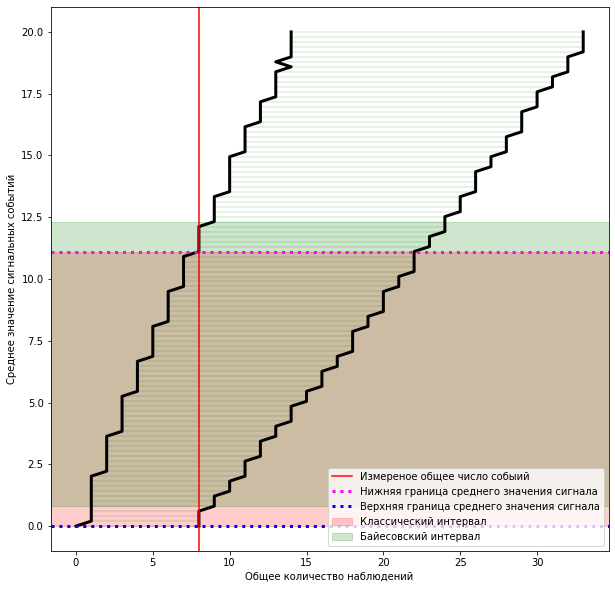

In [122]:
obs_true = 8

ll = 0
ul = None

for i, mu_sig in enumerate(mus_sig):
    if (ll == 0) and lower_limits[i]>= obs_true:
        ll =  mu_sig
    if (ul is None) and upper_limits[i]>= obs_true:
        ul =  mu_sig
        
    
f = plt.figure(figsize = (10, 10))
# Строим интервалы для сканированных значений
for i, mu_sig in enumerate(mus_sig):
    plt.plot([lower_limits[i],upper_limits[i]],[mu_sig, mu_sig], color = "green", linewidth = 0.2)
    
plt.plot(lower_limits, mus_sig, color = "black", linewidth = 3)
plt.plot(upper_limits, mus_sig, color = "black", linewidth = 3)
plt.axvline(8, color = "red", label = "Измереное общее число собыий")
plt.axhline(ll, color = "magenta", ls = ":", linewidth = 3, label = "Нижняя граница среднего значения сигнала")
plt.axhline(ul, color = "blue", ls = ":", linewidth = 3, label = "Верхняя граница среднего значения сигнала")
plt.axhspan(ll,ul, color = "red", alpha = 0.2, label = "Классический интервал")
plt.axhspan(bayessian_ll,bayessian_ul, color = "green", alpha = 0.2, label = "Байесовский интервал")
plt.xlabel("Общее количество наблюдений")
plt.ylabel("Среднее значение сигнальных событий")
plt.legend()


Подчеркнем еще раз что байесовский и классические интервалы не только монут принимать разные значения, но и имеют разный смысл. Байесовский интервал описывает область значений параметра в которую попадает параметр с заданой вероятностью. Классический интервал описывает область возможных значений параметра, которые генерируют выборки совместимые с полученным измерением.

### Смещение оценки

Смещением оценки (bias) называется разница между значением оценки (estimand) по выборке и истиным значением параметра, усреденная по всем выборкам из истиного распределения:

$$bias(\hat{\theta}(·)) = \mathbb{E}[\hat\theta(\mathcal{D})] − \theta^*$$

Если смещение оценки равно нулю, то оценка называется несмещеной (unbiased). Пример несмещеной оценки - среднее. Для проверки смещености оценки можно использовать "игрушечный" Монте-Карло (toy Monte-Carlo). В этом методе выбирается какое-то значение параметра $\theta$ и генерируется большое число выборок из распределения с этим параметром. После этого, считается среднее отклонение оценки от истиной по всем выборкам. В случае несмещеной оценки отклонение дложно падать с ростом числа выборок.

Рассмотрим MLE оценки гауссовского распределения и их среднее смещение с ростом числа выборок. Напомним, что:

$$\mu_{MLE} = \bar{x} \equiv \frac{1}{N_\mathcal{D}}\sum_{\mathcal{D}}x_i$$
$$\sigma^2_{MLE} = \frac{1}{N_\mathcal{D}}\sum_{\mathcal{D}}(x_i-\bar x)^2$$

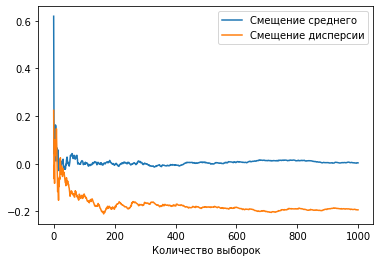

In [129]:
from scipy.stats import norm

sample_size = 5

def mu(sample):
    return sample.mean()
    
def sigmas(sample):
    return sample.std()**2

mu_ests = []
sigma_ests = []
mu_bias = []
sigma_bias = []

n_samples = 1000

for _ in range(n_samples):
    sample = norm.rvs(size = sample_size)
    mu_ests.append(mu(sample))
    sigma_ests.append(sigmas(sample))    
    mu_bias.append(np.mean(mu_ests))
    sigma_bias.append(np.mean(sigma_ests)-1)    

plt.plot(range(n_samples), mu_bias, label = "Смещение среднего")
plt.plot(range(n_samples), sigma_bias, label = "Смещение дисперсии")
plt.xlabel("Количество выборок")
plt.legend()

Полученные результаты не должны быть слишком удивительны - мы рассуждали о свойствах этих оценок в одной из первых лекций. Мы видим, что среднее по выборке является __несмещенной__ оценкой среднего по генеральной совокупности, а среднеквадратичное отлонения вляется __смещеной__ оценкой дисперсии.

### Дисперсия оценки

Смещение - не единственная характеристика оценки. В примере выше мы исопльзовали среднее по выборки для оценки параметра $\mu$. Рассмотрим другую оценку - давайте считать за $\hat{\mu}$ первый элемент выборки:

$$\mathcal{D} = {x_1, x_2, ..., x_n}$$
$$\hat{\mu} = \pi(\mathcal{D}) = x_1$$

Несложно видеть что такая оценка будет несмещеной. В то же время, такая оценка будет намного сильнее меняться от выброрки к выборке чем оценка среднего по выбоке. Для количестввенной характеристики разброса оценки используется (как несложно догадаться) дисперсия (variance) оценки:

$$\mathbb{V}[\hat{\theta}] \equiv \mathbb{E}[\hat\theta^2] - (\mathbb{E}[\hat\theta])^2$$

В идеале, мы хотели бы чтобы наша оценка не слишком сильно менялась бы в зависимости от выборки - то есть мы хотели бы снизить дисперсию оценки. Существует, однако, нижний порог дисперсии оценки. Этот порог называется границе Крамера-Рео (Cramer-Reo lower bound). Оказывется, что при выполнени некоторых условий на гладкость генерирующей функции $p(x|\theta^*)$ дисперсия любой несмещеной оценки подчинена неравенству:

$$V[\hat{\theta}]\geq\frac{1}{NF(\theta^*)}$$

где $N$- это размер выборки, а $F(\theta^*)$ - информация Фишера. 
    

Оценка ошибки среднего $\sigma_{\mu} = \frac{\sigma}{\sqrt{N}}$ нормального распределения является формулой дисперсии оценки среднего. Можно показать, что оценка среднего нормального распределения через среднее по выборке является оценкой с минимльной дисперсией. Сответственно, формула ошибки среднего находится ровно на нижней границе Крамера-Рео. Более того, можно показать что все MLE - оценки находятся на нижней границе Крамера-Рео, вследствие чего MLE оценки называются _асимптотически оптимальными_ (asymptoticaly optimal).
    

### Баланс смещения-дисперсии

Чтобы описать насколько (в среднем) будет ошибкться наша оценка, можно рассмотреть средний квадрат ошибки (Mean Squared Error, MSE):

$$\text{MSE} \equiv \mathbb{E}[(\hat{\theta}-\theta^*)^2]$$

Усреднение происходит по всем возможным выборкам данных. Раскроем скобки внутри этого выражения:

$$MSE = \mathbb{E}[\hat{\theta}^2]-2 \mathbb{E}[\hat{\theta}\theta^*] +\mathbb{E}[\theta^{*2}] $$
$$MSE = \mathbb{E}[\hat{\theta}^2] -  \mathbb{E}[\hat{\theta}]^2 + \mathbb{E}[\hat{\theta}]^2 -2 \mathbb{E}[\hat{\theta}\theta^*] +\mathbb{E}[\theta^{*2}] $$

Учтем, что $\theta^*$ - это константа, а значит $\mathbb{E}[\theta^*] = \theta[*]$

$$MSE = \mathbb{V}[\hat\theta] +  \mathbb{E}[\hat{\theta}]^2 -2 \mathbb{E}[\hat{\theta}]\theta^* +\theta^{*2} $$
$$MSE = \mathbb{V}[\hat\theta] +  (\mathbb{E}[\hat{\theta}]-\theta^{*})^2 $$
$$MSE = \mathbb{V}[\hat\theta] + bias(\hat{\theta})^2 $$

Получается, что финальная ошибка предсказания складывыается из дисперии и смещения оценки. Это равенство называется балансом смещения дисперсии (bias-variance tradeoff). Из него, в частности, следует что наилучшая оценка совсем не обязательно явяется несмещеной - если при выборе оценок дисперсия убывает быстрее смещения, то наилушая оценка вполне может иметь ненулевое смещение.